In [1]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data1 = pd.read_excel('data/FrontiersDS.xlsx', sheet_name='Wide')

In [3]:
data2 = pd.read_excel('data/FrontiersDS.xlsx', sheet_name='Long')

In [4]:
data1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,The data in this sheet was used for the formul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,SA,SA_A,SA.A_TSB_A,465374,1027715,NaN,1289650,800581,324424,73015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA,SA_A,SA.A_TSB_B,193151,1050974,NaN,504113,294680,189630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
headings = data1.loc[[2]].values
z = list(headings.flatten())

In [6]:
data1.columns = z

In [7]:
data1.head()

,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,The data in this sheet was used for the formul...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,SA,SA_A,SA.A_TSB_A,465374,1027715,NaN,1289650,800581,324424,73015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA,SA_A,SA.A_TSB_B,193151,1050974,NaN,504113,294680,189630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data1 = data1.drop([0,1], axis=0)

In [9]:
# forgot to remove a row
data1 = data1.drop([2], axis=0)
data1.head()

,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,SA,SA_A,SA.A_TSB_A,465374,1027715,NaN,1289650,800581,324424,73015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA,SA_A,SA.A_TSB_B,193151,1050974,NaN,504113,294680,189630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SA,SA_A,SA.A_TSB_C,403286,1850391,NaN,1169501,15,228163,73558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SA,SA_A,SA.A_TSB_D,129833,5140770,NaN,1926072,124282,0,188367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SA,SA_A,SA.A_TSB_E,117105,3422557,NaN,246751,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
headings2 = data2.loc[[1]].values
w = list(headings2.flatten())
data2.columns = w
data2.head()

,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data2 = data2.drop([0], axis=0)
data2.head()

,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
1,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2-Pentanone,Ketone,981±11 (141),43.0,1289650,504113,1169501,1926072,246751,560337,...,673781,592162,468142,559183,1225829,169495,359499,875905,637563,2988409


In [13]:
data2 = data2.drop([1], axis=0)
data2.head()

,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2-Pentanone,Ketone,981±11 (141),43.0,1289650,504113,1169501,1926072,246751,560337,...,673781,592162,468142,559183,1225829,169495,359499,875905,637563,2988409
6,Decane,Alkane,NaN,43.0,800581,294680,15,124282,0,456376,...,0,0,0,0,0,0,0,0,0,348154


In [14]:
data2

,Compounds,Chemical_class,NaN,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2-Pentanone,Ketone,981±11 (141),43.0,1289650,504113,1169501,1926072,246751,560337,...,673781,592162,468142,559183,1225829,169495,359499,875905,637563,2988409
6,Decane,Alkane,NaN,43.0,800581,294680,15,124282,0,456376,...,0,0,0,0,0,0,0,0,0,348154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,n-Tridecan-1-ol,Alcohol,2074±20,55.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
65,1-Tetradecanol,Alcohol,2165±10 (27),55.0,NaN,NaN,NaN,NaN,NaN,NaN,...,851004,922978,593032,450711,843660,0,78672,84426,146349,635257
66,n-Pentadecanol,Alcohol,2254±15,83.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
67,1-Hexadecanol,Alcohol,2382±5 (49),83.0,NaN,NaN,NaN,NaN,NaN,NaN,...,850885,1183943,382201,390122,1033300,0,0,0,0,482026


In [15]:
data2 = data2.rename(columns={np.nan: 'CI'})
data2.head()

,Compounds,Chemical_class,CI,NaN,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2-Pentanone,Ketone,981±11 (141),43.0,1289650,504113,1169501,1926072,246751,560337,...,673781,592162,468142,559183,1225829,169495,359499,875905,637563,2988409
6,Decane,Alkane,NaN,43.0,800581,294680,15,124282,0,456376,...,0,0,0,0,0,0,0,0,0,348154


In [16]:
data2.columns

Index([     'Compounds', 'Chemical_class',             'CI',              nan,
           'SA.A_TSB_A',     'SA.A_TSB_B',     'SA.A_TSB_C',     'SA.A_TSB_D',
           'SA.A_TSB_E',     'SA.B_TSB_A',     'SA.B_TSB_B',     'SA.B_TSB_C',
           'SA.B_TSB_D',     'SA.B_TSB_E',     'SA.A_BHI_A',     'SA.A_BHI_B',
           'SA.A_BHI_C',     'SA.A_BHI_D',     'SA.A_BHI_E',     'SA.B_BHI_A',
           'SA.B_BHI_B',     'SA.B_BHI_C',     'SA.B_BHI_D',     'SA.B_BHI_E',
            'SA.A_LB_A',      'SA.A_LB_B',      'SA.A_LB_C',      'SA.A_LB_D',
            'SA.A_LB_E',      'SA.B_LB_A',      'SA.B_LB_B',      'SA.B_LB_C',
            'SA.B_LB_D',      'SA.B_LB_E',     'PA.A_BHI_A',     'PA.A_BHI_B',
           'PA.A_BHI_C',     'PA.A_BHI_D',     'PA.A_BHI_E',     'PA.B_BHI_A',
           'PA.B_BHI_B',     'PA.B_BHI_C',     'PA.B_BHI_D',     'PA.B_BHI_E',
            'PA.A_LB_A',      'PA.A_LB_B',      'PA.A_LB_C',      'PA.A_LB_D',
            'PA.A_LB_E',      'PA.B_LB_A',      'PA.

In [17]:
data2.columns = data2.columns.fillna('SD')
data2.head()

,Compounds,Chemical_class,CI,SD,SA.A_TSB_A,SA.A_TSB_B,SA.A_TSB_C,SA.A_TSB_D,SA.A_TSB_E,SA.B_TSB_A,...,EC.A_TSB_A,EC.A_TSB_B,EC.A_TSB_C,EC.A_TSB_D,EC.A_TSB_E,EC.B_TSB_A,EC.B_TSB_B,EC.B_TSB_C,EC.B_TSB_D,EC.B_TSB_E
2,Ethyl Acetate,Ester,888±8 (234),43.0,465374,193151,403286,129833,117105,316764,...,887825,670603,576884,636851,NaN,119313,128397,309004,548442,339404
3,Ethanol,Alcohol,932±8 (,45.0,1027715,1050974,1850391,5140770,3422557,914667,...,7585417,7461659,2372532,5114072,7870420,1364553,1451138,5650813,3588158,3962927
4,"Propanoic acid, ethyl ester",Fatty acid ethyl ester,953±7 (87),57.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,2-Pentanone,Ketone,981±11 (141),43.0,1289650,504113,1169501,1926072,246751,560337,...,673781,592162,468142,559183,1225829,169495,359499,875905,637563,2988409
6,Decane,Alkane,NaN,43.0,800581,294680,15,124282,0,456376,...,0,0,0,0,0,0,0,0,0,348154


In [18]:
data1.head()

,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,SA,SA_A,SA.A_TSB_A,465374,1027715,NaN,1289650,800581,324424,73015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA,SA_A,SA.A_TSB_B,193151,1050974,NaN,504113,294680,189630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SA,SA_A,SA.A_TSB_C,403286,1850391,NaN,1169501,15,228163,73558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SA,SA_A,SA.A_TSB_D,129833,5140770,NaN,1926072,124282,0,188367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SA,SA_A,SA.A_TSB_E,117105,3422557,NaN,246751,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see a lot of NaN values in both our dataframes so far. While it could be assumed these values are 0 it is interesting to see some 0 values are already present in the dataframes. Assuming NaN is 0 is valid however, as it means in different compounds in the case of data2 there is no readings for these samples as they are not present.

We use a simple imputer based on the average value of columns to calculate NaN values.

In [19]:
nan_cols = [i for i in data1.columns if data1[i].isnull().any()]
len(nan_cols)

58

The vast majority of columns have some NaN values. We could try follow a linear regression approach to predict these NaN values but this could be a very time consuming and costly approach performing LR on each of the 58 columns with NaN values.

In [20]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
num = data1.iloc[:, 3:]
imp.fit(num)
imp.transform(num)

array([[4.65374000e+05, 1.02771500e+06, 1.79894074e+04, ...,
        1.73037615e+05, 6.62122074e+05, 8.24690630e+07],
       [1.93151000e+05, 1.05097400e+06, 1.79894074e+04, ...,
        1.73037615e+05, 6.62122074e+05, 8.24690630e+07],
       [4.03286000e+05, 1.85039100e+06, 1.79894074e+04, ...,
        1.73037615e+05, 6.62122074e+05, 8.24690630e+07],
       ...,
       [3.09004000e+05, 5.65081300e+06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.21023920e+07],
       [5.48442000e+05, 3.58815800e+06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.52575460e+07],
       [3.39404000e+05, 3.96292700e+06, 0.00000000e+00, ...,
        0.00000000e+00, 4.82026000e+05, 9.71565490e+07]])

In [21]:
imputed_data1 = pd.DataFrame(imp.transform(num))
heading_d1 = data1.iloc[:, 3:].columns
imputed_data1.columns = heading_d1
imputed_data1

,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,Methyl isovalerate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,465374.0,1027715.0,17989.407407,1289650.0,800581.0,324424.000000,73015.0,287247.703704,46016.203704,0.000000,...,2.098782e+06,97878.333333,85753.37037,10167.740741,94159.37037,85581.62963,586042.296296,173037.615385,662122.074074,82469063.0
1,193151.0,1050974.0,17989.407407,504113.0,294680.0,189630.000000,0.0,287247.703704,46016.203704,0.000000,...,2.098782e+06,97878.333333,85753.37037,10167.740741,94159.37037,85581.62963,586042.296296,173037.615385,662122.074074,82469063.0
2,403286.0,1850391.0,17989.407407,1169501.0,15.0,228163.000000,73558.0,287247.703704,46016.203704,0.000000,...,2.098782e+06,97878.333333,85753.37037,10167.740741,94159.37037,85581.62963,586042.296296,173037.615385,662122.074074,82469063.0
3,129833.0,5140770.0,17989.407407,1926072.0,124282.0,0.000000,188367.0,287247.703704,46016.203704,0.000000,...,2.098782e+06,97878.333333,85753.37037,10167.740741,94159.37037,85581.62963,586042.296296,173037.615385,662122.074074,82469063.0
4,117105.0,3422557.0,17989.407407,246751.0,0.0,0.000000,0.0,287247.703704,46016.203704,0.000000,...,2.098782e+06,97878.333333,85753.37037,10167.740741,94159.37037,85581.62963,586042.296296,173037.615385,662122.074074,82469063.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,119313.0,1364553.0,0.000000,169495.0,0.0,218195.561404,0.0,287247.703704,0.000000,97276.929825,...,2.896150e+05,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,60325589.0
80,128397.0,1451138.0,0.000000,359499.0,0.0,218195.561404,0.0,287247.703704,0.000000,97276.929825,...,7.499420e+05,0.000000,0.00000,0.000000,0.00000,0.00000,78672.000000,0.000000,0.000000,107880324.0
81,309004.0,5650813.0,0.000000,875905.0,0.0,218195.561404,109170.0,287247.703704,0.000000,97276.929825,...,4.793150e+05,0.000000,0.00000,0.000000,0.00000,0.00000,84426.000000,0.000000,0.000000,72102392.0
82,548442.0,3588158.0,0.000000,637563.0,0.0,218195.561404,60834.0,287247.703704,0.000000,97276.929825,...,2.750809e+06,0.000000,0.00000,0.000000,0.00000,0.00000,146349.000000,0.000000,0.000000,85257546.0


In [22]:
data2['Chemical_class'].value_counts()

Alcohol                   24
Ketone                    12
Fatty acid ethyl ester    11
Ester                      6
Acid                       4
Aldehyde                   2
Pyrrole                    2
Alkane                     2
Alkene                     1
Lactone                    1
Nitrile                    1
Indole                     1
Name: Chemical_class, dtype: int64

In [23]:
training_features1 = data1.iloc[:, : 3]
training_features1

,Species,Strain,Samples
3,SA,SA_A,SA.A_TSB_A
4,SA,SA_A,SA.A_TSB_B
5,SA,SA_A,SA.A_TSB_C
6,SA,SA_A,SA.A_TSB_D
7,SA,SA_A,SA.A_TSB_E
...,...,...,...
82,EC,EC_B,EC.B_TSB_A
83,EC,EC_B,EC.B_TSB_B
84,EC,EC_B,EC.B_TSB_C
85,EC,EC_B,EC.B_TSB_D


In [24]:
pd.value_counts(training_features1.Species, normalize = True)

SA    0.357143
EC    0.321429
PA    0.321429
Name: Species, dtype: float64

In [25]:
pd.value_counts(training_features1.Strain, normalize = True)

SA_A    0.178571
SA_B    0.178571
PA_A    0.166667
EC_A    0.166667
EC_B    0.154762
PA_B    0.154762
Name: Strain, dtype: float64

In [26]:
pd.value_counts(training_features1.iloc[:, 2], normalize = True)

SA.A_TSB_D    0.011905
PA.A_LB_A     0.011905
EC.B_LB_C     0.011905
SA.B_BHI_A    0.011905
SA.B_TSB_D    0.011905
                ...   
PA.B_BHI_E    0.011905
SA.B_TSB_B    0.011905
SA.B_TSB_C    0.011905
PA.A_LB_E     0.011905
SA.A_TSB_A    0.011905
Name: Samples , Length: 84, dtype: float64

In [27]:
data1.shape

(84, 70)

In [28]:
y_pred = ['SA'] * len(data1)
y_pred = pd.DataFrame(data = y_pred,
                      index = data1.index.values,
                      columns = ['Species'])
y_pred.head()

,Species
3,SA
4,SA
5,SA
6,SA
7,SA


In [29]:
numeric_features = data1.iloc[:, 3:]
numeric_features = pd.DataFrame(numeric_features)

In [30]:
category = data1.iloc[:, :3]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(category, imputed_data1,test_size=0.15)

In [32]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Nearest Neighbors", "Baseline","Random Forest"], total_time_limit=5*60)
automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 434163.499277 trained in 0.89 seconds
2_DecisionTree rmse 497813.325911 trained in 13.19 seconds
3_Linear rmse 355103.619375 trained in 8.07 seconds
* Step default_algorithms will try to check up to 2 models
4_Default_RandomForest rmse 378897.086861 trained in 2.98 seconds


X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors rmse 482167.360408 trained in 0.99 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 329538.037808 trained in 0.36 seconds
AutoML fit time: 35.46 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline',
                   'Random Forest'],
       total_time_limit=300)

In [33]:
y_predicted = automl.predict(X_test)
y_predicted
#print(pd.DataFrame({"Predicted": y_predicted[], "Species": np.array(y_test)}))

array([587990.58813961, 484754.94988278, 259113.26032363, 325029.07557432,
       330524.64935331, 490250.52366177, 495746.09744076, 336020.2231323 ,
       403759.57729218, 187703.77627443, 182208.20249544, 501241.67121975,
       593486.1619186 ])

In [34]:
X_train25, X_test25, y_train25, y_test25 = train_test_split(category, imputed_data1,test_size=0.25)

In [35]:
automl25 = AutoML(algorithms=["Decision Tree", "Linear", "Nearest Neighbors", "Baseline","Random Forest"], total_time_limit=5*60)
automl25.fit(X_train25, y_train25)

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 246856.95428 trained in 0.53 seconds
2_DecisionTree rmse 247754.84449 trained in 4.07 seconds
3_Linear rmse 263535.381601 trained in 1.56 seconds
* Step default_algorithms will try to check up to 2 models
4_Default_RandomForest rmse 239064.915964 trained in 2.55 seconds


X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors rmse 264147.803008 trained in 1.1 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 238931.388536 trained in 0.41 seconds
AutoML fit time: 19.13 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline',
                   'Random Forest'],
       total_time_limit=300)

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(num)

array([[  465374. ,  1027715. ,        0. , ...,        0. ,        0. ,
        84102956.5],
       [  193151. ,  1050974. ,        0. , ...,   694807.5,   738730. ,
        92931159.5],
       [  403286. ,  1850391. ,        0. , ...,        0. ,        0. ,
        84102956.5],
       ...,
       [  309004. ,  5650813. ,        0. , ...,        0. ,        0. ,
        72102392. ],
       [  548442. ,  3588158. ,        0. , ...,        0. ,        0. ,
        85257546. ],
       [  339404. ,  3962927. ,        0. , ...,        0. ,   482026. ,
        97156549. ]])

In [37]:
knn_imputed = pd.DataFrame(imputer.fit_transform(num))
heading_d1 = data1.iloc[:, 3:].columns
knn_imputed.columns = heading_d1
knn_imputed

,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,Methyl isovalerate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,465374.0,1027715.0,0.0,1289650.0,800581.0,324424.0,73015.0,1045093.0,74647.0,0.0,...,519778.5,0.0,0.0,0.0,0.0,0.0,39336.0,0.0,0.0,84102956.5
1,193151.0,1050974.0,0.0,504113.0,294680.0,189630.0,0.0,1268001.5,0.0,0.0,...,711040.5,0.0,45529.0,0.0,142667.5,70604.5,263691.5,694807.5,738730.0,92931159.5
2,403286.0,1850391.0,0.0,1169501.0,15.0,228163.0,73558.0,1064532.0,0.0,0.0,...,519778.5,0.0,0.0,0.0,0.0,0.0,39336.0,0.0,0.0,84102956.5
3,129833.0,5140770.0,0.0,1926072.0,124282.0,0.0,188367.0,0.0,0.0,0.0,...,4325965.5,349238.0,191111.0,0.0,0.0,0.0,359841.5,0.0,241013.0,84629470.5
4,117105.0,3422557.0,0.0,246751.0,0.0,0.0,0.0,1268001.5,74647.0,0.0,...,5461712.5,349238.0,191111.0,0.0,0.0,0.0,390803.0,0.0,241013.0,91207047.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,119313.0,1364553.0,0.0,169495.0,0.0,159997.0,0.0,549406.5,0.0,0.0,...,289615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60325589.0
80,128397.0,1451138.0,0.0,359499.0,0.0,159997.0,0.0,1268001.5,0.0,0.0,...,749942.0,0.0,0.0,0.0,0.0,0.0,78672.0,0.0,0.0,107880324.0
81,309004.0,5650813.0,0.0,875905.0,0.0,0.0,109170.0,670738.0,0.0,165645.5,...,479315.0,0.0,0.0,0.0,0.0,0.0,84426.0,0.0,0.0,72102392.0
82,548442.0,3588158.0,0.0,637563.0,0.0,0.0,60834.0,718595.0,0.0,130092.0,...,2750809.0,0.0,0.0,0.0,0.0,0.0,146349.0,0.0,0.0,85257546.0


In [38]:
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(category, knn_imputed,test_size=0.15)

In [39]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Nearest Neighbors", "Baseline","Random Forest"], total_time_limit=5*60)
automl.fit(X_trainknn, y_trainknn)

AutoML directory: AutoML_3
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 229605.700218 trained in 0.58 seconds
2_DecisionTree rmse 491324.331872 trained in 4.05 seconds
3_Linear rmse 778164.69303 trained in 2.22 seconds
* Step default_algorithms will try to check up to 2 models
4_Default_RandomForest rmse 175504.124782 trained in 2.26 seconds


X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors rmse 188088.298472 trained in 1.22 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 173853.803084 trained in 0.33 seconds
AutoML fit time: 20.02 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline',
                   'Random Forest'],
       total_time_limit=300)

In [40]:
X_trainknn25, X_testknn25, y_trainknn25, y_testknn25 = train_test_split(category, knn_imputed,test_size=0.25)

In [41]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Nearest Neighbors", "Baseline","Random Forest"], total_time_limit=5*60)
automl.fit(X_trainknn25, y_trainknn25)

AutoML directory: AutoML_4
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 253097.581351 trained in 0.6 seconds
2_DecisionTree rmse 255857.381857 trained in 4.12 seconds
3_Linear rmse 264675.491844 trained in 1.59 seconds
* Step default_algorithms will try to check up to 2 models
4_Default_RandomForest rmse 242098.464173 trained in 2.78 seconds


X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors rmse 278028.785964 trained in 0.86 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 242098.464173 trained in 0.38 seconds
AutoML fit time: 19.37 seconds
AutoML best model: 4_Default_RandomForest


AutoML(algorithms=['Decision Tree', 'Linear', 'Nearest Neighbors', 'Baseline',
                   'Random Forest'],
       total_time_limit=300)

In [42]:
y_predicted = automl.predict(X_testknn25)
y_predicted
#print(pd.DataFrame({"Predicted": y_predictedknn, "Target": np.array(y_testknn25)}))

array([264899.43907786, 150588.94408935, 150588.94408935, 264899.43907786,
       150588.94408935, 150588.94408935, 150588.94408935, 150588.94408935,
       150588.94408935, 150588.94408935, 150588.94408935, 150588.94408935,
       150588.94408935, 150588.94408935, 279258.64638683, 264899.43907786,
       150588.94408935, 150588.94408935, 150588.94408935, 150588.94408935,
       279258.64638683])

In [43]:
data1.head()

,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,SA,SA_A,SA.A_TSB_A,465374,1027715,NaN,1289650,800581,324424,73015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA,SA_A,SA.A_TSB_B,193151,1050974,NaN,504113,294680,189630,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,SA,SA_A,SA.A_TSB_C,403286,1850391,NaN,1169501,15,228163,73558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SA,SA_A,SA.A_TSB_D,129833,5140770,NaN,1926072,124282,0,188367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,SA,SA_A,SA.A_TSB_E,117105,3422557,NaN,246751,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
X1 = pd.DataFrame(data1.iloc[:, 3:])
y1 = pd.Series(data1["Strain"])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1)

In [46]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train, y_train)

2021-10-20 21:23:19,811 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA_B'


AutoML directory: AutoML_5
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 3.225204 trained in 21.14 seconds
2_Linear logloss 1.357509 trained in 26.54 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.54975 trained in 36.43 seconds
4_Default_RandomForest logloss 0.912605 trained in 21.82 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 3.425839 trained in 5.16 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.90312 trained in 0.38 seconds
AutoML fit time: 129.97 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [47]:
y_predicted = automl.predict(X_test)
y_predicted = pd.DataFrame(y_predicted, columns={'Strain'})

In [48]:
print(pd.DataFrame({"Predicted": y_predicted["Strain"], "Target": np.array(y_test)}))

  Predicted Target
0      EC_B   EC_B
1      SA_B   SA_A
2      SA_B   SA_B
3      EC_B   EC_B
4      SA_A   SA_A
5      PA_B   PA_B
6      SA_A   SA_A
7      SA_A   SA_A
8      EC_B   PA_A


In [49]:
valuesy = np.array(y_test)

In [116]:
def accuracy_auto(array_pred, array_target):
    i = 0
    count = 0
    zx = np.array(array_target)
    while i < len(array_pred):
        if array_pred['Strain'][i] == zx[i]:
            count += 1
            i += 1
        else:
            i += 1

    return(count / len(array_pred))

In [117]:
accuracy_auto(y_predicted, valuesy)

0.7777777777777778

In [51]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(X1, y1, test_size=0.3)

In [52]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train30, y_train30)

2021-10-20 21:25:30,178 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA_B'


AutoML directory: AutoML_6
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 5.586492 trained in 21.51 seconds
2_Linear logloss 1.5819 trained in 20.18 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.684719 trained in 21.95 seconds
4_Default_RandomForest logloss 1.169727 trained in 23.02 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 3.871066 trained in 5.31 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.985326 trained in 0.51 seconds
AutoML fit time: 109.16 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [53]:
y_predicted30 = automl.predict(X_test30)
y_predicted30 = pd.DataFrame(y_predicted30, columns={'Strain'})
print(pd.DataFrame({"Predicted": y_predicted30["Strain"], "Target": np.array(y_test30)}))

   Predicted Target
0       EC_B   EC_B
1       SA_A   SA_A
2       SA_B   SA_B
3       EC_B   EC_B
4       SA_A   SA_A
5       PA_A   PA_B
6       SA_A   SA_A
7       SA_A   SA_A
8       PA_A   PA_A
9       PA_B   PA_B
10      PA_A   PA_A
11      SA_A   SA_A
12      SA_A   SA_B
13      PA_A   SA_A
14      EC_A   EC_A
15      EC_B   EC_B
16      PA_B   PA_B
17      PA_A   PA_A
18      SA_A   SA_A
19      PA_B   PA_B
20      EC_A   EC_A
21      SA_A   SA_B
22      EC_B   EC_A
23      SA_A   SA_B
24      EC_B   EC_A
25      PA_A   PA_A


In [118]:
values = np.array(y_test30)

In [119]:
accuracy_auto(y_predicted30, values)

0.7307692307692307

In [56]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(X1, y1, test_size=0.2)

In [57]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train20, y_train20)

2021-10-20 21:27:19,831 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA_A'


AutoML directory: AutoML_7
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 7.387692 trained in 24.8 seconds
2_Linear logloss 0.763105 trained in 27.39 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.623978 trained in 28.75 seconds
4_Default_RandomForest logloss 1.139257 trained in 26.32 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 2.81669 trained in 7.39 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.763105 trained in 0.38 seconds
AutoML fit time: 136.17 seconds
AutoML best model: 2_Linear


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [58]:
y_predicted20 = automl.predict(X_test20)
y_predicted20 = pd.DataFrame(y_predicted20, columns={'Strain'})
print(pd.DataFrame({"Predicted": y_predicted20["Strain"], "Target": np.array(y_test20)}))

   Predicted Target
0       EC_B   EC_B
1       SA_A   SA_A
2       SA_A   SA_B
3       EC_B   EC_B
4       SA_A   SA_A
5       PA_A   PA_B
6       SA_A   SA_A
7       SA_A   SA_A
8       PA_A   PA_A
9       PA_A   PA_B
10      PA_A   PA_A
11      SA_A   SA_A
12      SA_A   SA_B
13      SA_A   SA_A
14      EC_B   EC_A
15      EC_B   EC_B
16      PA_A   PA_B


In [120]:
accuracy_auto(y_predicted20, y_test20)

0.6470588235294118

In [170]:
X1.head()

,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,Methyl isovalerate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
3,465374,1027715,NaN,1289650,800581,324424,73015,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193151,1050974,NaN,504113,294680,189630,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,403286,1850391,NaN,1169501,15,228163,73558,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,129833,5140770,NaN,1926072,124282,0,188367,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,117105,3422557,NaN,246751,0,0,0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
X_train25, X_test25, y_train25, y_test25 = train_test_split(X1, y1, test_size=0.25)

In [61]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train25, y_train25)

2021-10-20 21:29:36,518 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'SA_B'


AutoML directory: AutoML_8
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 2.412218 trained in 27.16 seconds
2_Linear logloss 0.666864 trained in 25.64 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.336914 trained in 28.71 seconds
4_Default_RandomForest logloss 1.00787 trained in 22.72 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 1.617412 trained in 5.19 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.666864 trained in 0.53 seconds
AutoML fit time: 127.3 seconds
AutoML best model: 2_Linear


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [62]:
y_predicted25 = automl.predict(X_test25)
y_predicted25 = pd.DataFrame(y_predicted25, columns={'Strain'})
print(pd.DataFrame({"Predicted": y_predicted25["Strain"], "Target": np.array(y_test25)}))

   Predicted Target
0       EC_B   EC_B
1       SA_A   SA_A
2       SA_A   SA_B
3       EC_B   EC_B
4       SA_A   SA_A
5       PA_A   PA_B
6       SA_A   SA_A
7       SA_A   SA_A
8       PA_A   PA_A
9       PA_B   PA_B
10      PA_A   PA_A
11      SA_A   SA_A
12      SA_A   SA_B
13      PA_A   SA_A
14      PA_A   EC_A
15      EC_B   EC_B
16      PA_A   PA_B
17      PA_A   PA_A
18      SA_A   SA_A
19      PA_A   PA_B
20      EC_B   EC_A


In [121]:
accuracy_auto(y_predicted25, y_test25)

0.6190476190476191

In [64]:
X_train40, X_test40, y_train40, y_test40 = train_test_split(X1, y1, test_size=0.40)

In [65]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train40, y_train40)

2021-10-20 21:31:44,094 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'PA_A'


AutoML directory: AutoML_9
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 1.854583 trained in 20.65 seconds
2_Linear logloss 0.377057 trained in 21.18 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 0.916796 trained in 22.03 seconds
4_Default_RandomForest logloss 0.76903 trained in 21.66 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 0.47707 trained in 5.23 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.377057 trained in 0.34 seconds
AutoML fit time: 107.72 seconds
AutoML best model: 2_Linear


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [66]:
y_predicted40 = automl.predict(X_test40)
y_predicted40 = pd.DataFrame(y_predicted40, columns={'Strain'})
print(pd.DataFrame({"Predicted": y_predicted40["Strain"], "Target": np.array(y_test40)}))

   Predicted Target
0       EC_B   EC_B
1       SA_A   SA_A
2       SA_B   SA_B
3       EC_B   EC_B
4       SA_A   SA_A
5       PA_A   PA_B
6       SA_A   SA_A
7       SA_B   SA_A
8       PA_A   PA_A
9       PA_B   PA_B
10      PA_A   PA_A
11      SA_B   SA_A
12      SA_A   SA_B
13      SA_B   SA_A
14      EC_A   EC_A
15      EC_B   EC_B
16      PA_B   PA_B
17      PA_B   PA_A
18      SA_A   SA_A
19      PA_B   PA_B
20      EC_A   EC_A
21      SA_B   SA_B
22      EC_B   EC_A
23      EC_B   SA_B
24      EC_B   EC_A
25      PA_A   PA_A
26      PA_B   PA_B
27      PA_B   PA_B
28      SA_B   SA_A
29      SA_B   SA_B
30      PA_B   PA_A
31      SA_A   SA_B
32      PA_A   PA_A
33      EC_A   EC_A


In [122]:
accuracy_auto(y_predicted40, y_test40)

0.6470588235294118

In [68]:
X_train50, X_test50, y_train50, y_test50 = train_test_split(X1, y1, test_size=0.50)

In [69]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest", "Nearest Neighbors", "Xgboost"],
                total_time_limit=5*60)
automl.fit(X_train50, y_train50)

2021-10-20 21:33:32,121 supervised.preprocessing.eda ERROR There was an issue when running EDA. could not convert string to float: 'EC_A'


AutoML directory: AutoML_10
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Nearest Neighbors', 'Xgboost']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_DecisionTree logloss 11.51293 trained in 21.87 seconds
2_Linear logloss 0.456629 trained in 21.83 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost logloss 1.421264 trained in 22.53 seconds
4_Default_RandomForest logloss 1.63988 trained in 47.12 seconds


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


Exception while producing SHAP explanations. 'NoneType' object has no attribute 'shap_values'
Continuing ...
5_Default_NearestNeighbors logloss 0.788799 trained in 7.75 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.398333 trained in 0.55 seconds
AutoML fit time: 142.81 seconds
AutoML best model: Ensemble


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest',
                   'Nearest Neighbors', 'Xgboost'],
       total_time_limit=300)

In [70]:
y_predicted50 = automl.predict(X_test50)
y_predicted50 = pd.DataFrame(y_predicted50, columns={'Strain'})
print(pd.DataFrame({"Predicted": y_predicted50["Strain"], "Target": np.array(y_test50)}))

   Predicted Target
0       EC_B   EC_B
1       SA_A   SA_A
2       SA_B   SA_B
3       EC_B   EC_B
4       SA_A   SA_A
5       PA_A   PA_B
6       SA_A   SA_A
7       SA_B   SA_A
8       PA_A   PA_A
9       PA_B   PA_B
10      PA_B   PA_A
11      SA_B   SA_A
12      SA_A   SA_B
13      SA_B   SA_A
14      EC_A   EC_A
15      EC_B   EC_B
16      PA_B   PA_B
17      PA_B   PA_A
18      SA_A   SA_A
19      PA_B   PA_B
20      EC_A   EC_A
21      SA_B   SA_B
22      EC_A   EC_A
23      SA_A   SA_B
24      EC_B   EC_A
25      PA_B   PA_A
26      PA_B   PA_B
27      PA_B   PA_B
28      SA_B   SA_A
29      SA_B   SA_B
30      PA_B   PA_A
31      SA_A   SA_B
32      PA_B   PA_A
33      EC_A   EC_A
34      PA_A   PA_A
35      PA_A   PA_B
36      EC_B   EC_B
37      SA_A   SA_A
38      SA_A   SA_A
39      EC_B   EC_A
40      EC_B   EC_B
41      EC_A   EC_A


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


In [123]:
accuracy_auto(y_predicted50, y_test50)

0.6190476190476191

Automatically created module for IPython interactive environment
Average difference of 0.000000 with std. dev. of 0.000000.


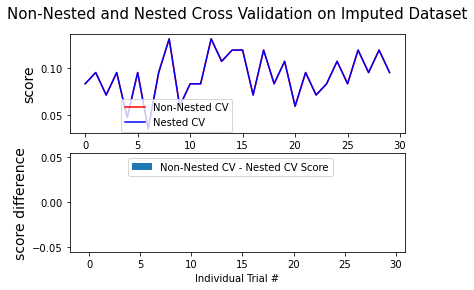

In [148]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

print(__doc__)

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
X_iris = imputed_data1
y_iris = y1

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Imputed Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

# Random Forest Classifier

## RF for Strain at 20% Split

In [107]:
def accuracy(array_pred, array_target):
    i = 0
    count = 0
    zx = np.array(array_target)
    while i < len(array_pred):
        if array_pred[i] == zx[i]:
            count += 1
            i += 1
        else:
            i += 1

    return(count / len(array_pred))

In [74]:
xyz = data1['Strain']
xyz

3     SA_A
4     SA_A
5     SA_A
6     SA_A
7     SA_A
      ... 
82    EC_B
83    EC_B
84    EC_B
85    EC_B
86    EC_B
Name: Strain, Length: 84, dtype: object

In [75]:
exit_status_map = {'SA_A': 0, 'SA_B': 1 ,'EC_A': 2, 'PA_A': 3, 'EC_B': 4, 'PA_B': 5}
xyz = xyz.map(exit_status_map)

In [76]:
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(imputed_data1, xyz, test_size=0.2, random_state=0)

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_trainrf, y_trainrf)
y_predrf = regressor.predict(X_testrf)

In [78]:
y_predrf = y_predrf.astype(int)
print(y_predrf)

[3 4 2 3 0 4 0 4 1 0 3 0 2 2 0 0 2]


In [79]:
print(pd.DataFrame({"Predicted": np.array(y_predrf), "Target": y_testrf}))

    Predicted  Target
33          3       3
43          4       3
46          2       3
53          3       3
25          0       0
57          4       5
5           0       0
59          4       5
29          1       1
11          0       1
72          3       4
16          0       0
69          2       2
80          2       2
19          0       1
30          0       1
78          2       2


In [104]:
accuracy(y_predrf, y_testrf)

0.5294117647058824

In [172]:
# Cross-Validation for 20:80 RF split
from sklearn import svm
clf20 = svm.SVC(kernel='linear', C=1).fit(X_trainrf, y_trainrf)
clf20.score(X_testrf, y_testrf)

0.7058823529411765

## 10% Split

In [81]:
X_trainrf10, X_testrf10, y_trainrf10, y_testrf10 = train_test_split(imputed_data1, xyz, test_size=0.1, random_state=0)

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_trainrf10, y_trainrf10)
y_predrf10 = regressor.predict(X_testrf10)

In [83]:
y_predrf10 = y_predrf10.astype(int)
print(y_predrf10)

[3 4 3 3 0 4 0 4 1]


In [84]:
print(pd.DataFrame({"Predicted": np.array(y_predrf10), "Target": y_testrf10}))

    Predicted  Target
33          3       3
43          4       3
46          3       3
53          3       3
25          0       0
57          4       5
5           0       0
59          4       5
29          1       1


In [105]:
accuracy(y_predrf10, y_testrf10)

0.6666666666666666

In [173]:
# Cross-Validation for 10:90 RF split
from sklearn import svm
clf10 = svm.SVC(kernel='linear', C=1).fit(X_trainrf10, y_trainrf10)
clf10.score(X_testrf10, y_testrf10)

0.6666666666666666

## 40%

In [86]:
X_trainrf40, X_testrf40, y_trainrf40, y_testrf40 = train_test_split(imputed_data1, xyz, test_size=0.4, random_state=0)

In [87]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_trainrf40, y_trainrf40)
y_predrf40 = regressor.predict(X_testrf40)

In [88]:
y_predrf40 = y_predrf40.astype(int)
print(y_predrf40)

[3 3 2 3 0 3 0 3 1 0 3 0 2 3 0 1 2 3 4 2 3 3 2 2 3 4 3 0 0 2 2 0 3 3]


In [89]:
print(pd.DataFrame({"Predicted": np.array(y_predrf40), "Target": y_testrf40}))

    Predicted  Target
33          3       3
43          3       3
46          2       3
53          3       3
25          0       0
57          3       5
5           0       0
59          3       5
29          1       1
11          0       1
72          3       4
16          0       0
69          2       2
80          3       2
19          0       1
30          1       1
78          2       2
76          3       4
51          4       5
77          2       2
86          3       4
64          3       4
44          2       3
66          2       4
58          3       5
48          4       5
75          3       4
9           0       1
6           0       0
71          2       2
62          2       2
10          0       1
36          3       3
55          3       3


In [106]:
accuracy(y_predrf40, y_testrf40)

0.47058823529411764

In [174]:
# Cross-Validation for 20:80 RF split
from sklearn import svm
clf40 = svm.SVC(kernel='linear', C=1).fit(X_trainrf40, y_trainrf40)
clf40.score(X_testrf40, y_testrf40)

0.7647058823529411

## 50% Split

In [91]:
X_trainrf50, X_testrf50, y_trainrf50, y_testrf50 = train_test_split(imputed_data1, xyz, test_size=0.5, random_state=0)

In [92]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_trainrf50, y_trainrf50)
y_predrf50 = regressor.predict(X_testrf50)

In [93]:
y_predrf50 = y_predrf50.astype(int)
print(y_predrf50)

[3 4 3 3 0 3 0 4 0 1 3 0 2 2 1 0 2 3 4 2 3 3 2 3 3 4 3 0 1 2 3 0 3 3 3 0 1
 0 4 0 2 4]


In [94]:
print(pd.DataFrame({"Predicted": np.array(y_predrf50), "Target": y_testrf50}))

    Predicted  Target
33          3       3
43          4       3
46          3       3
53          3       3
25          0       0
57          3       5
5           0       0
59          4       5
29          0       1
11          1       1
72          3       4
16          0       0
69          2       2
80          2       2
19          1       1
30          0       1
78          2       2
76          3       4
51          4       5
77          2       2
86          3       4
64          3       4
44          2       3
66          3       4
58          3       5
48          4       5
75          3       4
9           0       1
6           1       0
71          2       2
62          3       2
10          0       1
36          3       3
55          3       3
63          3       2
7           0       0
18          1       1
20          0       1
41          4       5
8           0       1
79          2       2
45          4       3


In [103]:
accuracy(y_predrf50, y_testrf50)

0.42857142857142855

In [175]:
# Cross-Validation for 50:50 RF split
from sklearn import svm
clf50 = svm.SVC(kernel='linear', C=1).fit(X_trainrf50, y_trainrf50)
clf50.score(X_testrf50, y_testrf50)

0.6190476190476191

## 25% Split

In [96]:
X_trainrf25, X_testrf25, y_trainrf25, y_testrf25 = train_test_split(imputed_data1, xyz, test_size=0.25, random_state=0)

In [97]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_trainrf25, y_trainrf25)
y_predrf25 = regressor.predict(X_testrf25)

In [98]:
y_predrf25 = y_predrf25.astype(int)
print(y_predrf25)

[3 4 3 3 0 4 0 4 1 0 3 0 2 2 0 0 2 3 4 2 2]


In [99]:
print(pd.DataFrame({"Predicted": np.array(y_predrf25), "Target": y_testrf25}))

    Predicted  Target
33          3       3
43          4       3
46          3       3
53          3       3
25          0       0
57          4       5
5           0       0
59          4       5
29          1       1
11          0       1
72          3       4
16          0       0
69          2       2
80          2       2
19          0       1
30          0       1
78          2       2
76          3       4
51          4       5
77          2       2
86          2       4


In [102]:
accuracy(np.array(y_predrf25), y_testrf25)

0.5238095238095238

In [176]:
# Cross-Validation for 25:75 RF split
from sklearn import svm
clf25 = svm.SVC(kernel='linear', C=1).fit(X_trainrf25, y_trainrf25)
clf25.score(X_testrf25, y_testrf25)

0.6666666666666666

In [156]:
data2['Chemical_class'].value_counts()

Alcohol                   24
Ketone                    12
Fatty acid ethyl ester    11
Ester                      6
Acid                       4
Aldehyde                   2
Pyrrole                    2
Alkane                     2
Alkene                     1
Lactone                    1
Nitrile                    1
Indole                     1
Name: Chemical_class, dtype: int64

In [163]:
imputed_data1.to_csv('data/imputed_wide.csv')

In [168]:
training_features1.to_csv('data/features_wide.csv')